In [118]:
import onnx
from onnx_tf.backend import prepare
import tensorflow as tf

In [119]:
tf.test.gpu_device_name()

2022-10-07 12:36:52.736553: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-07 12:36:52.736761: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-07 12:36:52.737001: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-07 12:36:52.737285: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-07 12:36:52.737401: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from S

'/device:GPU:0'

In [120]:
model = onnx.load("../../models/quickdraw_model/quickdraw.onnx")
tf_model = prepare(model)

In [121]:
import numpy as np
import matplotlib.pyplot as plt

## Dataloading

In [122]:
path = [
                    "full_numpy_bitmap_anvil.npy",
                    "full_numpy_bitmap_apple.npy",
                    "full_numpy_bitmap_broom.npy",
                    "full_numpy_bitmap_bucket.npy",
                    "full_numpy_bitmap_bulldozer.npy",
                    "full_numpy_bitmap_clock.npy",
                    "full_numpy_bitmap_cloud.npy",
                    "full_numpy_bitmap_computer.npy",
                    "full_numpy_bitmap_eye.npy",
                    "full_numpy_bitmap_flower.npy",
                   ]

size_of_data = 10000

data = np.array([])
ref = np.array([])
for index, item in enumerate(path):
    tmp = np.load(item, encoding="latin1", allow_pickle=True)
    tmp = tmp[:size_of_data]
    data = np.append(data, tmp)
    print(tmp.shape)
    ref = np.append(ref, np.full(size_of_data, index))
data = data.reshape(len(path), size_of_data, 784)

(10000, 784)
(10000, 784)
(10000, 784)
(10000, 784)
(10000, 784)
(10000, 784)
(10000, 784)
(10000, 784)
(10000, 784)
(10000, 784)


In [123]:
data.shape

(10, 10000, 784)

In [124]:
ref

array([0., 0., 0., ..., 9., 9., 9.])

In [125]:
data = data.reshape(data.shape[1]*len(path), 784)
data.shape

(100000, 784)

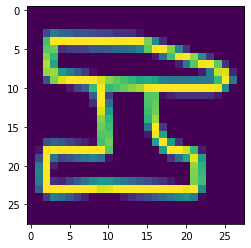

In [126]:
plt.imshow(data[2].reshape(28,28))

In [127]:
ex = data[0]
ex.shape

(784,)

In [128]:
arr = np.array([ex], dtype=np.float32)
arr.shape

(1, 784)

In [129]:
tf_out = tf_model.run(data.astype("float32"))

In [130]:
tf_out[0].shape

(100000, 10)

In [131]:
predicts = []
for i in tf_out[0]:
    predicts.append(np.argmax(i))

In [132]:
predicts

[7,
 2,
 2,
 7,
 7,
 2,
 2,
 0,
 1,
 2,
 0,
 0,
 7,
 7,
 2,
 1,
 2,
 7,
 7,
 1,
 0,
 0,
 2,
 2,
 7,
 2,
 2,
 0,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 7,
 2,
 7,
 2,
 2,
 2,
 2,
 7,
 0,
 2,
 2,
 0,
 2,
 0,
 1,
 7,
 2,
 0,
 0,
 2,
 0,
 7,
 2,
 2,
 0,
 2,
 7,
 7,
 7,
 2,
 0,
 7,
 0,
 0,
 2,
 0,
 7,
 7,
 0,
 0,
 0,
 0,
 1,
 2,
 7,
 0,
 2,
 0,
 7,
 7,
 0,
 7,
 0,
 0,
 2,
 2,
 0,
 7,
 2,
 0,
 0,
 2,
 2,
 7,
 0,
 0,
 0,
 3,
 2,
 2,
 0,
 0,
 0,
 1,
 2,
 1,
 2,
 2,
 2,
 0,
 2,
 2,
 1,
 2,
 2,
 7,
 7,
 0,
 0,
 0,
 7,
 2,
 7,
 0,
 2,
 7,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 3,
 2,
 2,
 0,
 2,
 0,
 2,
 1,
 2,
 0,
 0,
 0,
 7,
 0,
 0,
 0,
 7,
 1,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 2,
 7,
 0,
 0,
 0,
 0,
 2,
 0,
 7,
 3,
 2,
 0,
 0,
 0,
 0,
 7,
 2,
 0,
 2,
 2,
 2,
 2,
 7,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 7,
 2,
 2,
 0,
 0,
 7,
 0,
 0,
 7,
 0,
 7,
 0,
 2,
 0,
 7,
 2,
 0,
 7,
 0,
 0,
 0,
 0,
 0,
 2,
 7,
 2,
 7,
 7,
 0,
 7,
 0,
 7,
 0,
 2,
 7,
 1,
 2,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 2,
 0,
 2,
 7,
 2,
 2,
 0,
 7,
 2,


In [133]:
predicts = np.array(predicts)
predicts.shape

(100000,)

In [135]:
a = np.sum(predicts == ref)

In [137]:
a/(size_of_data*len(path))

0.37601